In [3]:
from ReversiTime import AI, place
import numpy as np
import time
board = np.zeros((8, 8), dtype=np.int)
board[3][4] = board[4][3] = 1
board[3][3] = board[4][4] = -1

ai1 = AI(color=-1)
ai2 = AI(color=1)
player = ai1

In [4]:
start = time.time()

player.go(board)
if player.candidate_list: 
    x, y = player.candidate_list[-1]
    display = board.copy()
    display[x, y]=10
    assert place(board, x, y, player.color)

print('turn=%d color=%d'%(np.sum(np.abs(board))-0, player.color))    
print('time=%s'%(time.time()-start))
player = ai1 if player==ai2 else ai2
display

num of sims: 2752
hoseholding takes 0.000000
player=-1 time=4.500777 turn=1 state searched=0 repeated=0
turn=5 color=-1
time=4.501697301864624


array([[ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 10,  0,  0,  0],
       [ 0,  0,  0, -1,  1,  0,  0,  0],
       [ 0,  0,  0,  1, -1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0]])

In [5]:
import torch
from ReversiNet import NNet

# nnet = NNet()
params = torch.load('temp.pth')
# nnet.load_state_dict(params)

In [7]:
fc1_weight = params['fc1.weight']
print(fc1_weight[0].reshape(8,8))
print(fc1_weight[1].reshape(8,8))
print(fc1_weight[2].reshape(8,8))

tensor([[ 2.7068,  0.6722,  2.4835, -0.7446, -0.8751,  2.7029,  1.1920,  2.6357],
        [ 1.3611, -2.1201, -1.9845, -1.3933, -0.8787, -2.3716, -2.2920, -1.6840],
        [ 2.6818, -2.8105,  1.1665, -1.5466,  1.9826,  0.7935, -2.4189,  2.7729],
        [-2.1667, -0.4154, -1.1561, -1.8482, -1.4205,  0.6950,  0.6527, -1.4014],
        [-1.6698,  0.0732, -1.2161, -2.3157, -0.8715,  0.1412, -0.9113,  0.5897],
        [ 2.8552, -2.0810,  2.3421,  0.1714, -0.7953,  0.8652, -2.4223,  2.9248],
        [-1.5468, -2.1715, -2.6752,  0.5700, -0.5810, -2.1836,  0.8318,  1.7559],
        [ 2.8260,  0.0876,  2.8043, -2.0172, -0.2587,  2.5835, -2.7096,  2.7867]])
tensor([[-2.8541,  1.8289, -2.8901,  0.3577, -0.7982, -3.0420,  0.7269, -2.3476],
        [-0.8734, -0.4395, -0.9118, -0.3031, -0.5511,  1.7224, -1.0518,  2.0228],
        [-2.8416,  0.7244, -0.1779, -0.8847, -1.4928, -0.3301,  1.5600, -2.9061],
        [ 1.3437, -0.8793, -0.9320,  2.7240, -2.3914, -2.6920, -1.4000,  2.7229],
        [ 2.323

In [8]:
import numpy as np 
weight = params['fc1.weight']


In [17]:
print(weight)
print(torch.flip(weight, dims=(0, 1)))

tensor([[ 0.5656,  0.3217, -0.0216,  ..., -0.0147, -0.0528,  0.1485],
        [-0.5129, -0.1324, -0.4207,  ..., -0.0154, -0.0630, -0.0448],
        [-0.0372,  0.4138,  0.1915,  ...,  0.0193, -0.0286,  0.0532],
        ...,
        [-0.2523, -0.0982,  0.0079,  ..., -0.0374, -0.3043, -0.2692],
        [ 0.0170, -0.0071,  0.0025,  ..., -0.1909, -0.1560, -0.5810],
        [ 0.1342, -0.0669,  0.0119,  ..., -0.0016,  0.3004,  0.5995]],
       device='cuda:0')
tensor([[ 0.5995,  0.3004, -0.0016,  ...,  0.0119, -0.0669,  0.1342],
        [-0.5810, -0.1560, -0.1909,  ...,  0.0025, -0.0071,  0.0170],
        [-0.2692, -0.3043, -0.0374,  ...,  0.0079, -0.0982, -0.2523],
        ...,
        [ 0.0532, -0.0286,  0.0193,  ...,  0.1915,  0.4138, -0.0372],
        [-0.0448, -0.0630, -0.0154,  ..., -0.4207, -0.1324, -0.5129],
        [ 0.1485, -0.0528, -0.0147,  ..., -0.0216,  0.3217,  0.5656]],
       device='cuda:0')


In [6]:
import numpy as np

WEIGHT20 = np.array([
    [ 0.98541204,  -0.045,             0.045,  0.04191742,  0.04185729, 0.045,       -0.045,   0.97116454],
       
    [ -0.045,       -0.30446803, -0.11258063, -0.05608972, -0.05857577,-0.11605463, -0.30616653,  -0.045 ],
    
    [ 0.045, -0.11835686,  0.00369619, -0.01073905, -0.013084  , 0.005706  , -0.11639149,  0.045],
       
    [ 0.05197595, -0.06659195, -0.01282388,  0.01832268,  0.0205201 ,-0.01321658, -0.06568969,  0.04408597],
    
    [ 0.05241211, -0.0599413 , -0.01134043,  0.02166829,  0.01608053,-0.01993317, -0.06629244,  0.04791857],
    
    [ 0.045, -0.11717497,  0.01329587, -0.01950666, -0.01219502,0.0036302 , -0.11091427,   0.045],
        
    [ -0.045, -0.29662156, -0.11206735, -0.0714942 , -0.06593978,-0.11826274,    -0.3029509 ,      -0.045],
    
    [ 0.99039419,  -0.045,  0.0364874 ,  0.03694624,  0.04121141,   0.045,         -0.045,   0.97900956],
], dtype=np.float16)

In [8]:
WEIGHT20.round(decimals=3)

array([[ 0.986, -0.045,  0.045,  0.042,  0.042,  0.045, -0.045,  0.971],
       [-0.045, -0.304, -0.113, -0.056, -0.059, -0.116, -0.306, -0.045],
       [ 0.045, -0.118,  0.004, -0.011, -0.013,  0.006, -0.116,  0.045],
       [ 0.052, -0.067, -0.013,  0.018,  0.021, -0.013, -0.066,  0.044],
       [ 0.052, -0.06 , -0.011,  0.022,  0.016, -0.02 , -0.066,  0.048],
       [ 0.045, -0.117,  0.013, -0.02 , -0.012,  0.004, -0.111,  0.045],
       [-0.045, -0.297, -0.112, -0.072, -0.066, -0.118, -0.303, -0.045],
       [ 0.99 , -0.045,  0.036,  0.037,  0.041,  0.045, -0.045,  0.979]],
      dtype=float16)

Text(0, 0.5, 'num of sims')

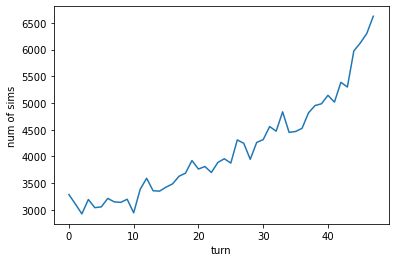

In [9]:
import matplotlib.pyplot as plt
import numpy as np 
a = [3327, 2757, 2660, 3166, 2969, 3350, 3264, 3292, 3131, 3347, 3508, 3732, 3688, 3515, 3173, 3487, 3318, 3929, 3756, 3841, 3770, 3614, 3407, 3727, 3512, 3614, 3936, 4168, 3104, 4267, 4048, 4735, 3511, 4547, 4391, 
4365, 4501, 5167, 5299, 5227, 5004, 4767, 5085, 5324, 5096, 6118, 5096, 7052]
b = [3133, 3132, 2952, 2950, 3222, 2838, 2977, 2850, 2897, 2829, 1507, 2699, 3387, 3033, 3246, 3168, 3649, 3379, 3332, 4094, 3426, 3553, 3525, 3548, 3653, 3657, 4208, 4189, 3424, 4507, 3862, 4246, 5024, 4424, 3758, 
3911, 4181, 3759, 4192, 3822, 4821, 4270, 4972, 4454, 5937, 5162, 6202, 5162]
c = [3408, 3309, 3153, 3235, 3183, 2702, 3178, 2991, 3223, 3126, 3197, 3371, 3543, 3319, 3459, 3452, 3486, 3294, 3790, 3859, 3759, 3945, 3492, 3992, 3908, 3569, 4291, 4246, 4434, 4334, 4771, 4181, 4412, 5097, 4732, 
4760, 4896, 4633, 5064, 4979, 4597, 5154, 5609, 5037, 5997, 6367, 7039, 6367]
d = np.array([3270, 3227, 2920, 3414, 2779, 3324, 3428, 3456, 3299, 3483, 3555, 3723, 3742, 3554, 3516, 3587, 3482, 3906, 3861, 3891, 4095, 4125, 4368, 4277, 4747, 4655, 4798, 4375, 4818, 3939, 4573, 5073, 4940, 5268, 4917, 
4829, 4523, 5705, 5255, 5915, 6155, 5875, 5887, 6384, 6879, 6856, 6879, 7924])
a = np.array(a)
b = np.array(b)
c = np.array(c)
plt.plot((a+b+c+d)/4)
# plt.plot(b)
# plt.plot(c)
# plt.plot(d)
plt.xlabel("turn")
plt.ylabel("num of sims")